In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(
    style='ticks',
    font_scale=1.5,
    context='paper'
)
import scipy.misc

colors = sns.color_palette('Set1')

In [92]:
def FA(x, ρ, W, w):
    ω = W * x + w * (1 - x)
    x = x * ρ * W/ω + x * (1 - ρ)    
    return x

def FB(x, ρ, W, w):
    ω = w * x + W * (1 - x)
    x = x * ρ * w/ω + x * (1 - ρ)
    return x

def H(x, ρ, W, w):
    return FB(FA(x, ρ, W, w), ρ, W, w)

def ddx(func, *args, dx=0.001):
    def f(x, *args):        
        return scipy.misc.derivative(func, x, dx=dx, args=args)
    return f

dFAdx = ddx(FA)
dFBdx = ddx(FB)
dHdx = ddx(H)

def x_star(ρ, W, w):
    return 1/2 - (W + w - np.sqrt((1-ρ)**2 * (W-w)**2 + 4*W*w))/(2 * (2-ρ) * (W-w))

In [93]:
x = np.linspace(0, 1, 1000)

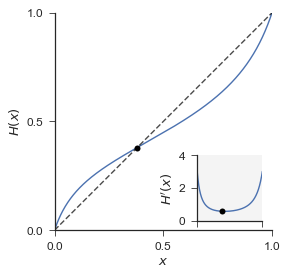

In [108]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
fig, ax = plt.subplots()
ρ = 0.5
W = 1
w = 0.1

ms = 6

# ax.plot(x, FA(x, ρ, W, w), label='$F_A$')
# ax.plot(x, FB(x, ρ, W, w), label='$F_B$')
ax.plot(x, H(x, ρ, W, w), label='$H$')
ax.plot(x_star(ρ, W, w), x_star(ρ, W, w), 'o', markersize=ms, color='k')
# ax.legend()

ax.plot(x, x, '--', color='k', alpha=0.7)
ax.set(
    xlabel='$x$',
    ylabel='$H(x)$',
    xticks=(0, 0.5, 1),
    yticks=(0, 0.5, 1),
    xlim=(0, 1),
    ylim=(0, 1)
)

ax.set_aspect(1.)

size = '30%'
axins = inset_axes(ax, width=size, height=size, loc=4, 
                   borderpad=0.8, axes_kwargs=dict(fc='#f4f4f4'))
# axins.plot(x, dFAdx(x, ρ, W, w), label='FA')
# axins.plot(x, dFBdx(x, ρ, W, w), label='FB')
axins.plot(x, dHdx(x, ρ, W, w), label='H')
axins.plot(x_star(ρ, W, w), dHdx(x_star(ρ, W, w), ρ, W, w), 'o', markersize=ms, color='k')
axins.set(
    xlim=(0, 1),
    ylim=(0, None),
    ylabel="$H'(x)$",
    yticks=[0, 2, 4]
)
plt.xticks(visible=False)
plt.yticks(visible=True)
sns.despine()
fig.savefig('../figures/H(x).pdf')

In [48]:
from sympy import *
init_printing()

x, ρ, W, w = symbols('x, ρ, W, w'.replace(',', ''))

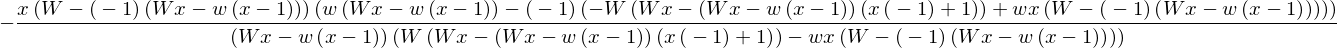

In [9]:
ω = W * x + w * (1 - x)
FAx = x * ρ * W/ω + x * (1 - ρ)
ω = w * FAx + W * (1 - FAx)
Hx = FAx * ρ * w/ω + FAx * (1 - ρ)
Hx = simplify(Hx)
Hx

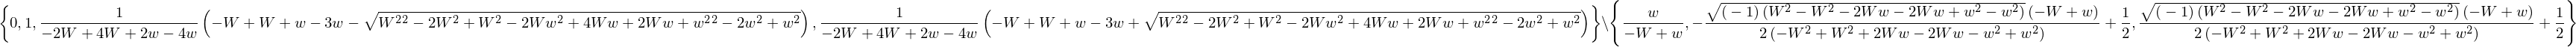

In [19]:
solveset((Hx-x),x)